In [3]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [4]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


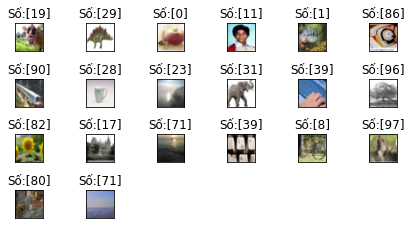

In [5]:
for i in range(20) :
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i])
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [7]:
model = Sequential()
model.add(Dense(3000, Activation('relu'), input_shape=((32*32*3,))))
'''model.add(Dense(5000, Activation('relu')))
model.add(Dense(2000, Activation('relu')))'''
model.add(Dense(1000, Activation('relu')))
model.add(Dense(100, Activation('softmax')))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
Total params: 12,320,100
Trainable params: 12,320,100
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2,batch_size=500)

Epoch 1/2
100/100 [==============================] - 67s 661ms/step - loss: 3.5640 - accuracy: 0.1647
Epoch 2/2
100/100 [==============================] - 68s 679ms/step - loss: 3.4173 - accuracy: 0.1848


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
model.save('/drive/MyDrive/Saved_Train/model.h5')